# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Beryl Cholif Arrahman Meuraxa
- **Email:** berylmeuraxa@gmail.com
- **ID Dicoding:** berylmeuraxa

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren dalam penggunaan rental sepeda?
- Pertanyaan 2: Bagaimana pengaruh penggunaan rental sepeda pada hari kerja dan akhir pekan?
- Pertanyaan 3: Bagaimana cuaca memengaruhi jumlah penyewaan sepeda?
- Pertanyaan 4: Berapa persentase kontribusi pengguna kasual dibandingkan dengan pengguna terdaftar?

## Import Semua Packages/Library yang Digunakan

In [1]:
#Import library yang dibutuhkan untuk analisis
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#Memuat Tabel hour dan menampilkan 5 baris pertama
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Informasi dasar tentang dataset
print(f"Jumlah baris: {day_df.shape[0]}, Jumlah kolom: {day_df.shape[1]}")

Jumlah baris: 731, Jumlah kolom: 16


### Assessing Data

In [4]:
#Memeriksa missing value pada tabel day
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
#Memeriksa duplikasi data pada tabel day
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
#Memeriksa innaccurate value pada tabel day
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
#Menampilkan nilai unik dari kolom untuk memastikan tidak adanya invalid value atau outlier
print(day_df['season'].unique())
print(day_df['yr'].unique())
print(day_df['mnth'].unique())
print(day_df['holiday'].unique())
print(day_df['weekday'].unique())
print(day_df['workingday'].unique())
print(day_df['weathersit'].unique())

[1 2 3 4]
[0 1]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[0 1]
[6 0 1 2 3 4 5]
[0 1]
[2 1 3]


In [8]:
# Cari baris dengan workingday=1 dan holiday=1
inconsistent_days = day_df[(day_df['workingday'] == 1) & (day_df['holiday'] == 1)]

# Tampilkan hasil
if inconsistent_days.empty:
    print("Tidak ada inkonsistensi logis antara workingday dan holiday.")
else:
    print("Inkonsistensi ditemukan:")
    print(inconsistent_days)

Tidak ada inkonsistensi logis antara workingday dan holiday.


In [9]:
#Memeriksa tipe data pada tabel day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Assessing Data Summary:**

tabel **day**:
- *Missing Value* = Tidak terdapat missing value
- *Duplicate Data* = Tidak terdapat duplikasi data
- *Innaccurate Value* = Tidak terdapat innaccurate value
- *Tipe Data* = Tipe data tidak sesuai pada kolom dteday

### Cleaning Data

In [10]:
#Mengkonversi tipe data menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [11]:
#Menampilkan informasi data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Cleaning Data Summary:**

- Mengkonversi tipe data kolom dteday menjadi datetime.

## Exploratory Data Analysis (EDA)

## Eksplorasi Data

### Descriptive Statistics

In [12]:
#Menampilkan ringkasan statistik deskriptif untuk semua kolom dalam dataset
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**

Dataset memiliki total seluruh record sebanyak 731 baris,

Berdasarkan rangkuman paramater statistik diatas kita memperoleh informasi dataset berupa:

**1. season (1: spring, 2: summer, 3: fall, 4: winter)**
- nilai *mean* 2.496 menunjukkan rata-rata rental sepeda berada pada musim semi atau panas dibanding musim lainnya.

**Musim dapat mempengaruhi pola penggunaan sepeda. musim panas mungkin memiliki aktivitas lebih tinggi dibandingkan musim dingin*

**2. yr (0: 2011, 1:2012)**
- nilai *mean* 0.500 yang dimana menunjukkan rata-rata distribusi tahun dataset yang merata antara 2011-2012

**Distribusi tahun merata yang menunjukkan tidak adanya anomali pada data*

**3. holiday (0: Tidak Libur, 1: Libur)**
- nilai *mean* dengan nilai 0.0287 yang menunjukkan rata-rata hari yang tidak libur lebih dominan dibanding hari libur.

**Hari libur yang sedikit kemungkinan memiliki pola yang berbeda dibandingkan hari kerja*

**4. weekday (0: Minggu, 1: Senin, 2: Selasa, 3: Rabu, 4: Kamis, 5: Jumat, 6: Sabtu)**
- nilai *mean* dengan nilai 2.997 yang menunjukkan distribusi pada hari rabu lebih dominan untuk merental sepeda dibanding hari lainnya.
 
**Perlu dianalisis apakah akhir pekan memiliki pola penggunaan yang berbeda dibandingkan hari biasa*

**5. workingday (0: No, 1: Yes)**
- nilai *mean* dengan nilai 0.6839 yang menunjukkan distribusi rental sepeda pada hari kerja dan hari tidak bekerja seimbang namun sedikit condong dominan ke arah hari kerja.

**6. weathersit (1: Cerah, sedikit awan. 2: Berkabut, berawan. 3: Hujan/salju ringan. 4: Cuaca buruk)**
- nilai *mean* 1.395 yang menunjukkan rata-rata sebagian besar kondisi cuaca adalah cerah atau berkabut/berawan.

**Cuaca buruk kemungkinan besar mengurangi jumlah penggunaan sepeda.*


**7. casual, registered, cnt**
- terlihat nilai *mean* dari *casual* sebanyak 848.17 dan *registered* sebanyak 3656.17 yang dimana temuan ini menunjukkan, rata-rata pengguna yang banyak melakukan rental adalah *pengguna registered*.


### Distribution Statistics

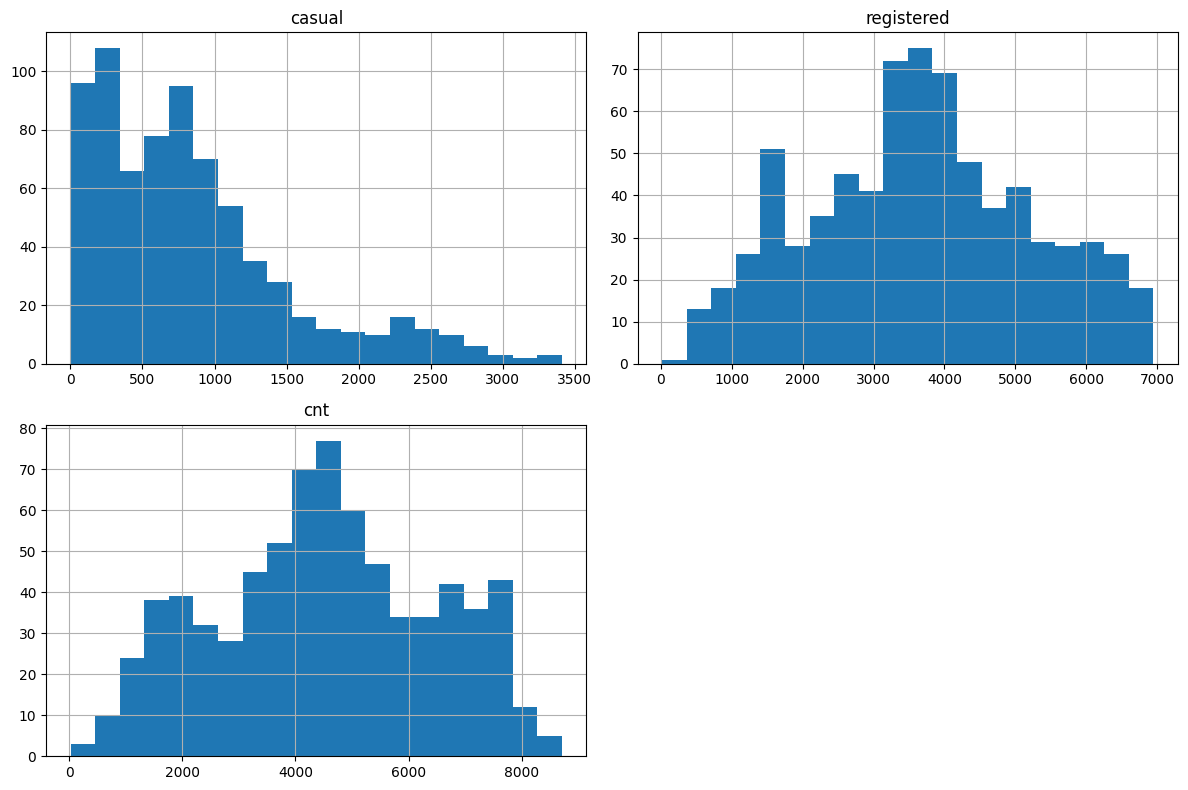

In [13]:
# Visualisasi distribusi variabel numerik
numerical_cols = ['casual', 'registered', 'cnt']
day_df[numerical_cols].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

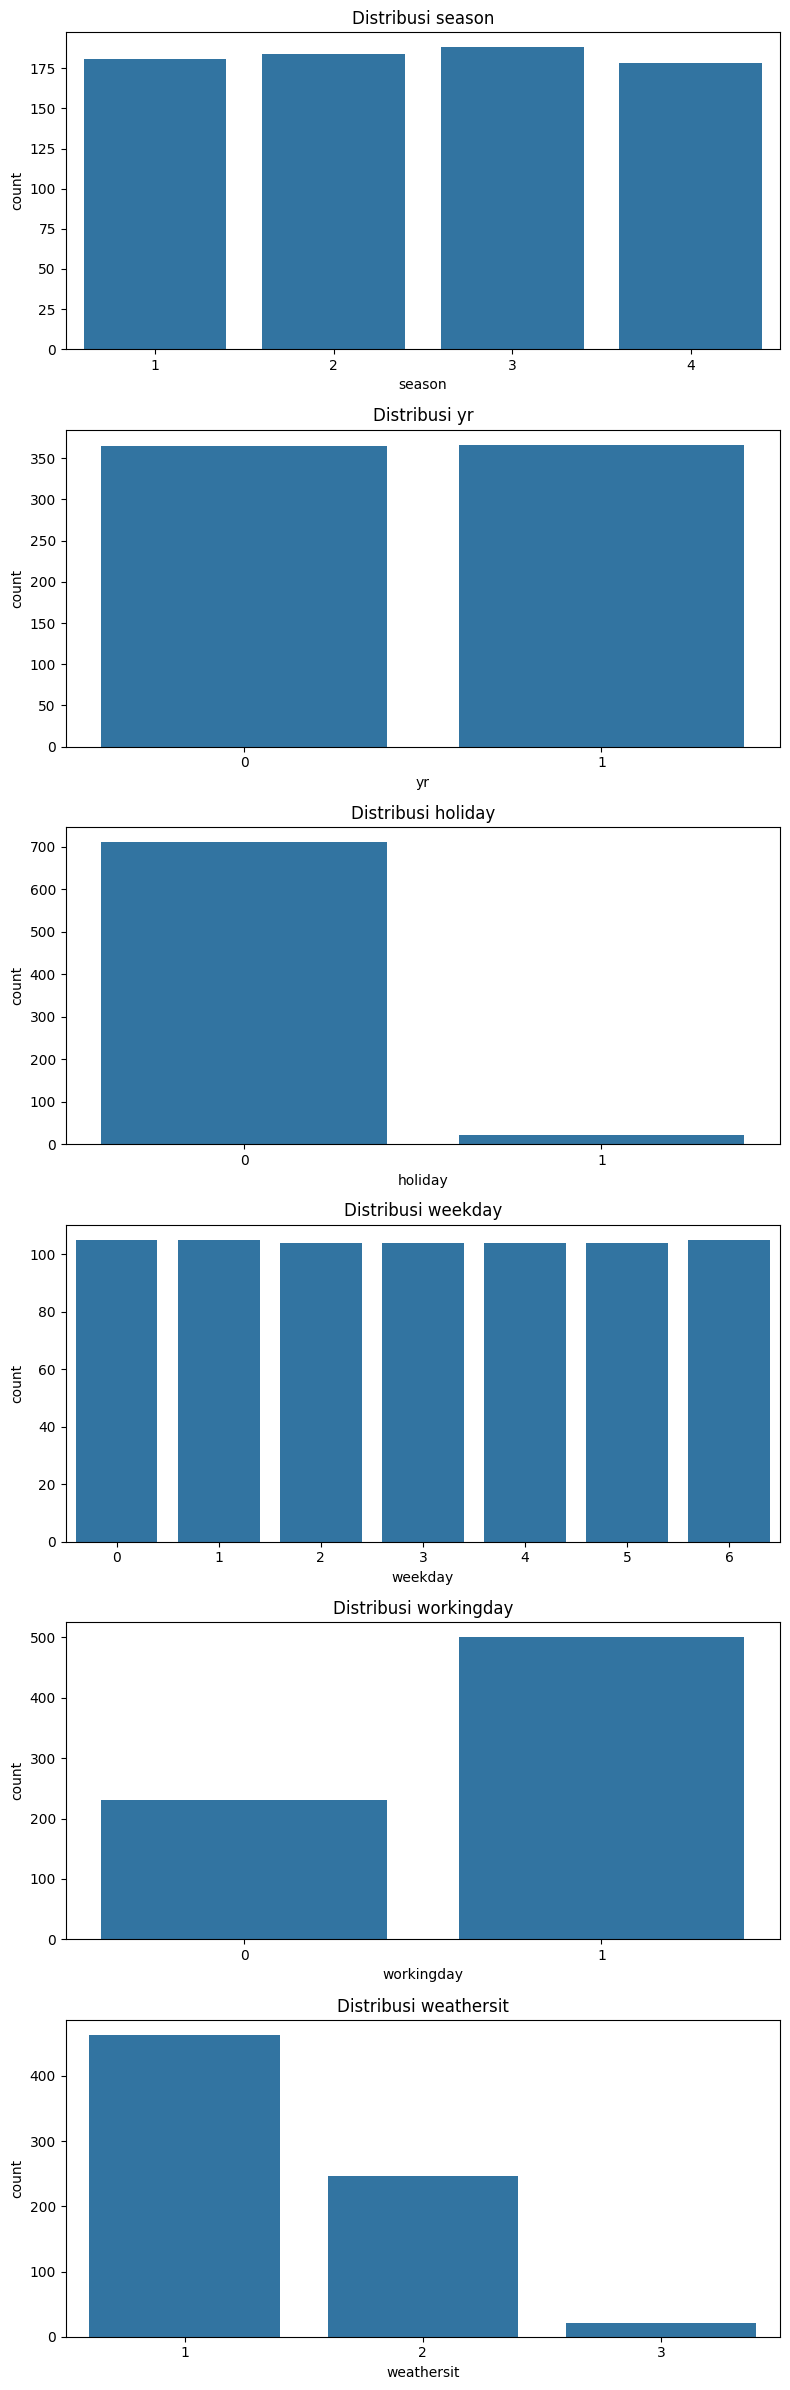

In [14]:
# Visualisasi distribusi variabel kategorikal
categorical_cols = ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit']

fig, axes = plt.subplots(nrows=len(categorical_cols), figsize=(8, 4 * len(categorical_cols)))
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=day_df, ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

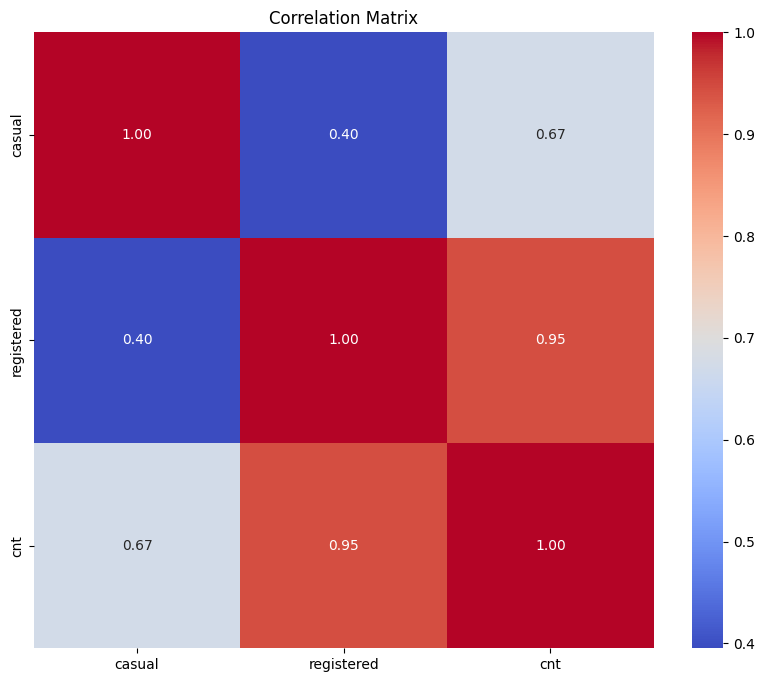

In [15]:
# Matriks korelasi
correlation_matrix = day_df[numerical_cols].corr()

# Heatmap untuk tabel numerik
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

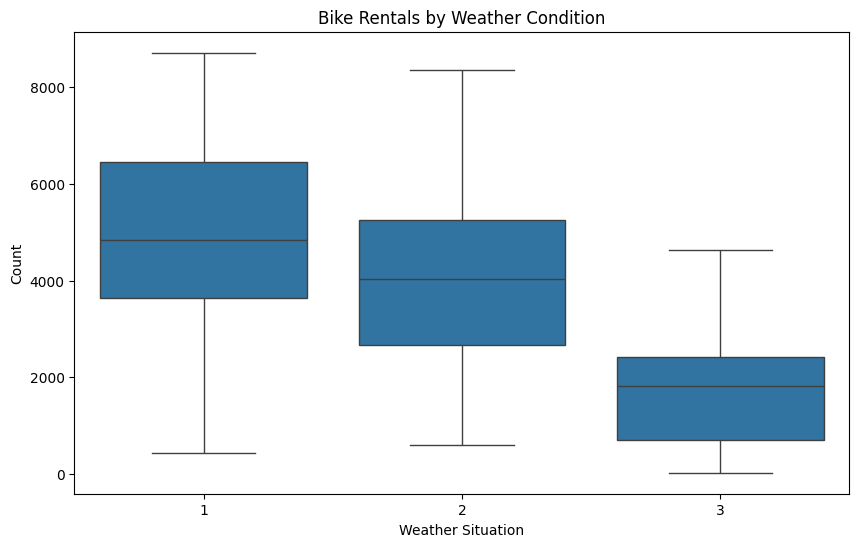

In [16]:
# Boxplot untuk cnt berdasarkan weathersit
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_df)
plt.title('Bike Rentals by Weather Condition')
plt.xlabel('Weather Situation')
plt.ylabel('Count')
plt.show()

### Hubungan antara Bulan dan Musim

In [17]:
# Filter data berdasarkan tahun
year_2011 = day_df[day_df['yr'] == 0]  # Tahun 2011
year_2012 = day_df[day_df['yr'] == 1]  # Tahun 2012

# Dictionary untuk mapping nama bulan
month_name_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Fungsi untuk menghasilkan mapping season dan mnth
def get_season_month_mapping(data, year_name):
    mapping = data.groupby('season')['mnth'].unique().reset_index()
    # Ubah angka bulan ke nama bulan
    mapping['mnth'] = mapping['mnth'].apply(lambda months: [month_name_map[m] for m in sorted(months)])
    mapping['season_name'] = mapping['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
    mapping['year'] = year_name
    return mapping

# Menghasilkan mapping untuk masing-masing tahun
mapping_2011 = get_season_month_mapping(year_2011, '2011')
mapping_2012 = get_season_month_mapping(year_2012, '2012')

# Menampilkan hasil
print("Hubungan season dan mnth untuk Tahun 2011:")
print(mapping_2011)

print("\nHubungan season dan mnth untuk Tahun 2012:")
print(mapping_2012)


Hubungan season dan mnth untuk Tahun 2011:
   season                  mnth season_name  year
0       1  [Jan, Feb, Mar, Dec]      Spring  2011
1       2  [Mar, Apr, May, Jun]      Summer  2011
2       3  [Jun, Jul, Aug, Sep]        Fall  2011
3       4  [Sep, Oct, Nov, Dec]      Winter  2011

Hubungan season dan mnth untuk Tahun 2012:
   season                  mnth season_name  year
0       1  [Jan, Feb, Mar, Dec]      Spring  2012
1       2  [Mar, Apr, May, Jun]      Summer  2012
2       3  [Jun, Jul, Aug, Sep]        Fall  2012
3       4  [Sep, Oct, Nov, Dec]      Winter  2012


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren dalam penggunaan rental sepeda?

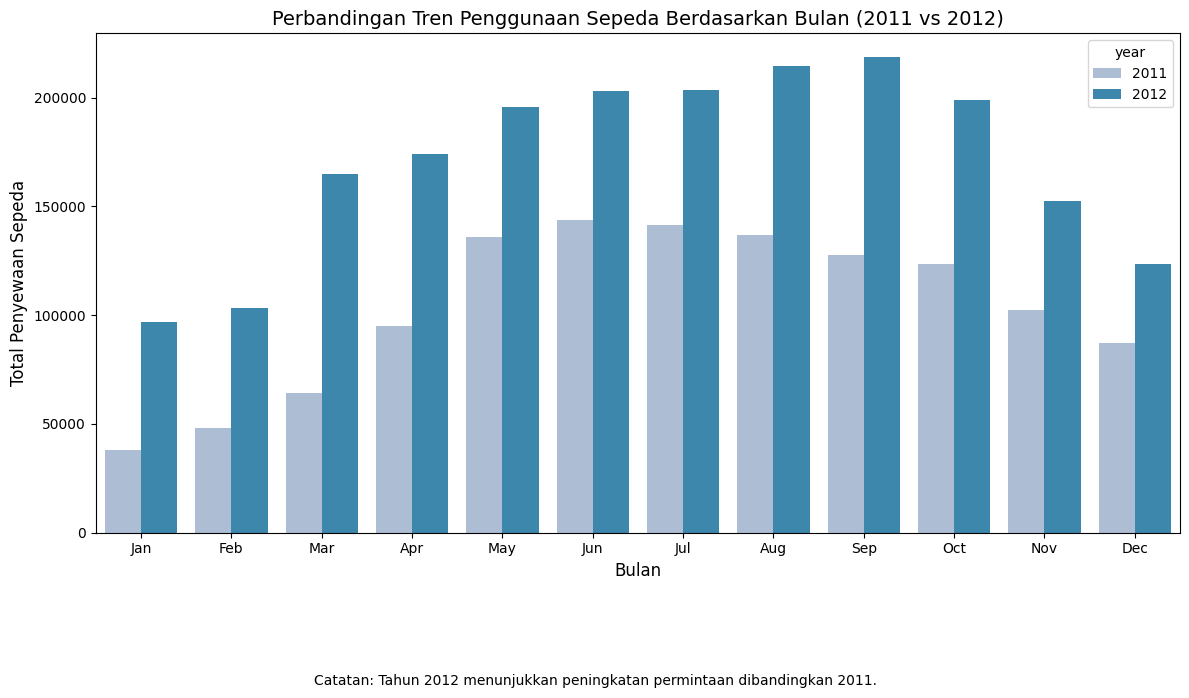

In [18]:
# Agregasi data berdasarkan tahun dan bulan
month_year_summary = day_df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

# Mengubah angka bulan menjadi nama bulan dan tahun menjadi year untuk interpretasi yang lebih baik
month_year_summary['year'] = month_year_summary['yr'].map({0: 2011, 1: 2012})
month_year_summary['month_name'] = month_year_summary['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

# Visualisasi clustered bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=month_year_summary, x='month_name', y='cnt', hue='year', palette={2011: '#a6bddb', 2012: '#2b8cbe'})
plt.title('Perbandingan Tren Penggunaan Sepeda Berdasarkan Bulan (2011 vs 2012)', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Penyewaan Sepeda', fontsize=12)
plt.figtext(0.5, -0.15, "Catatan: Tahun 2012 menunjukkan peningkatan permintaan dibandingkan 2011.", wrap=True, ha="center", fontsize=10)
plt.tight_layout()
plt.show()

**Insight:**

Berdasarkan visualisasi **clustered bar chart** yang membandingkan tren penggunaan rental sepeda antara tahun 2011 dan 2012, terlihat bahwa **tren penggunaan rental sepeda mengalami peningkatan signifikan dari tahun ke tahun**.Menunjukkan adanya pertumbuhan popularitas layanan ini. Peningkatan paling mencolok terjadi pada musim panas (Juni-Agustus) dan musim gugur (September-November) hal ini mungkin dikarenakan cuaca yang nyaman mendukung aktivitas luar ruangan seperti bersepeda. Meskipun permintaan rendah selama musim dingin (Desember-Februari), pada tahun 2012 terlihat mengalami peningkatan dibandingkan 2011, menunjukkan layanan ini diminati meskipun di kondisi cuaca yang kurang ideal. Secara keseluruhan, visualisasi ini memberikan gambaran bahwa layanan rental sepeda ini memiliki minat tren tinggi yang tidak hanya tumbuh secara musiman tetapi juga secara tahunan, dengan potensi untuk terus berkembang di masa depan.

### Pertanyaan 2: Bagaimana pengaruh penggunaan rental sepeda pada hari kerja dan akhir pekan?

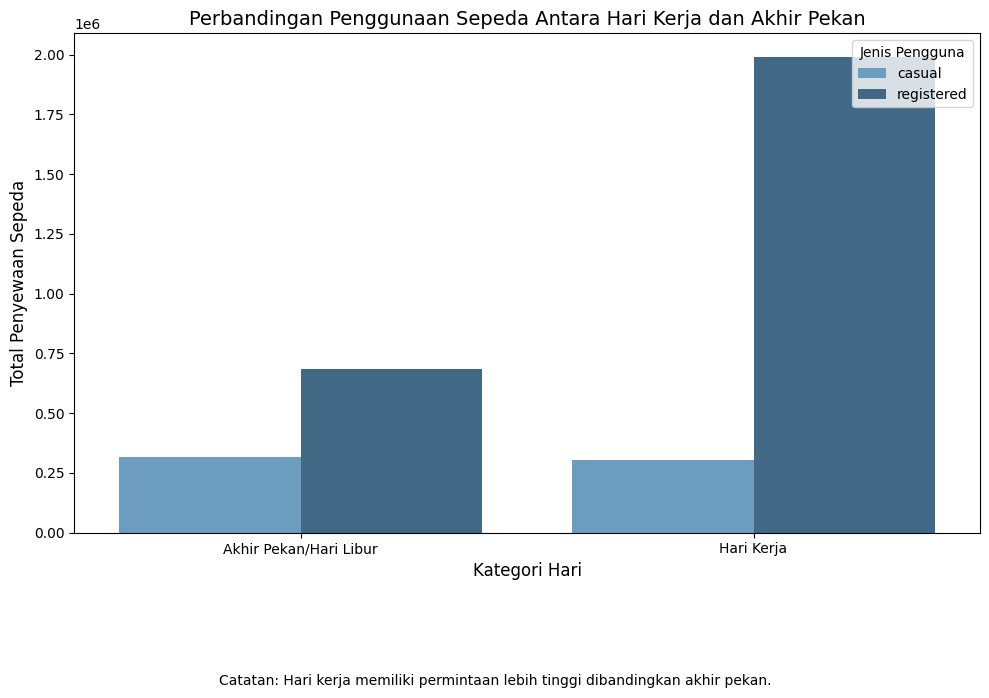

In [19]:
# Agregasi data berdasarkan workingday
workingday_summary = day_df.groupby('workingday')[['cnt', 'casual', 'registered']].sum().reset_index()

# Tambahkan label untuk interpretasi data
workingday_summary['workingday_label'] = workingday_summary['workingday'].map({0: 'Akhir Pekan/Hari Libur', 1: 'Hari Kerja'})

# Reshape data agar sesuai untuk clustered bar chart
workingday_melted = workingday_summary.melt(
    id_vars=['workingday', 'workingday_label'], 
    value_vars=['casual', 'registered'],
    var_name='user_type', 
    value_name='total_rentals'
)

# Visualisasi clustered bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=workingday_melted, x='workingday_label', y='total_rentals', hue='user_type', palette='Blues_d')
plt.title('Perbandingan Penggunaan Sepeda Antara Hari Kerja dan Akhir Pekan', fontsize=14)
plt.xlabel('Kategori Hari', fontsize=12)
plt.ylabel('Total Penyewaan Sepeda', fontsize=12)
plt.figtext(0.5, -0.15, "Catatan: Hari kerja memiliki permintaan lebih tinggi dibandingkan akhir pekan.", wrap=True, ha="center", fontsize=10)
plt.legend(title='Jenis Pengguna', loc='upper right')
plt.tight_layout()
plt.show()

**Insight:**

Berdasarkan analisis dan visualisasi, terlihat bahwa **ada perbedaan signifikan dalam penggunaan rental sepeda antara hari kerja dan akhir pekan**. Pada akhir pekan, permintaan lebih rendah secara keseluruhan dengan dominasi pengguna registered yang tertinggi diikuti dengan pengguna casual. Sementara itu pada hari kerja, permintaan cenderung tinggi secara keseluruhan. Pengguna registered kemungkinan besar menggunakan rental sepeda untuk transportasi bekerja sehari-hari. Kemudian pada pengguna casual, cenderung memiliki permintaan yang sama antara hari biasa dan akhir pekan. Perbedaan ini menunjukkan bahwa layanan rental sepeda memiliki dua segmen pengguna utama: **pengguna registered** yang menggunakan sepeda rutin untuk transportasi kerja dan **pengguna casual** yang menggunakan sepeda untuk hiburan atau hal lainnya.

### Pertanyaan 3: Bagaimana cuaca memengaruhi jumlah penyewaan sepeda?

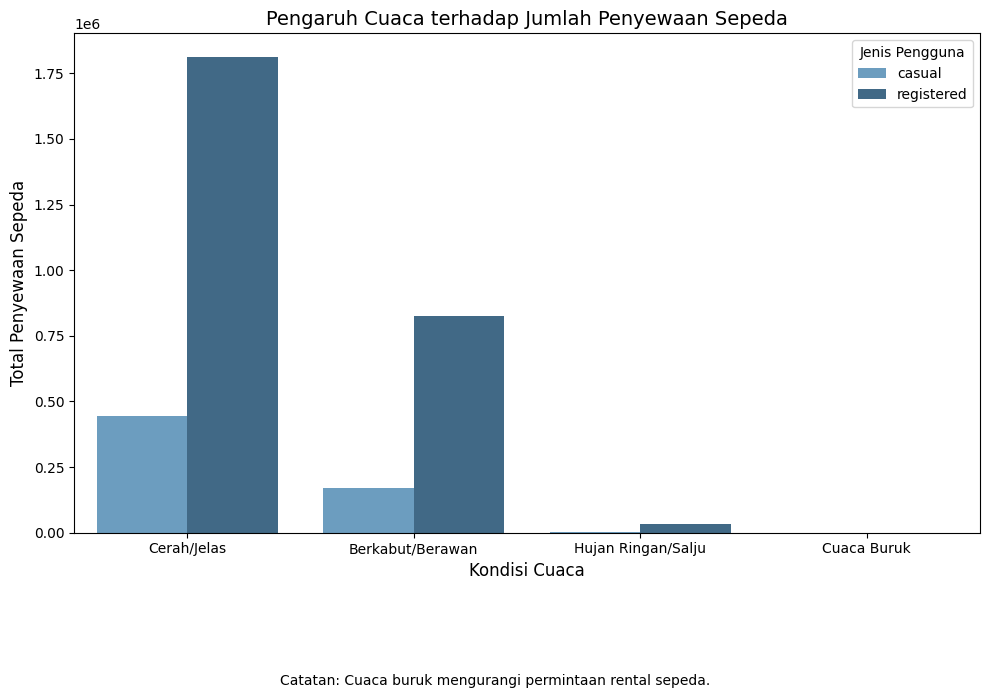

In [20]:
# Agregasi data berdasarkan weathersit
weather_summary = day_df.groupby('weathersit')[['casual', 'registered']].sum().reset_index()

# Pastikan semua kategori cuaca (1, 2, 3, 4) ada dalam data
all_weather_categories = [1, 2, 3, 4]
weather_summary = weather_summary.set_index('weathersit').reindex(all_weather_categories, fill_value=0).reset_index()

# Tambahkan label untuk interpretasi data
weather_summary['weather_label'] = weather_summary['weathersit'].map({1: 'Cerah/Jelas', 2: 'Berkabut/Berawan', 3: 'Hujan Ringan/Salju', 4: 'Cuaca Buruk'})

# Reshape data agar sesuai untuk clustered bar chart
weather_melted = weather_summary.melt(
    id_vars=['weathersit', 'weather_label'], 
    value_vars=['casual', 'registered'],
    var_name='user_type', 
    value_name='total_rentals'
)

# Visualisasi clustered bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=weather_melted, x='weather_label', y='total_rentals', hue='user_type', palette='Blues_d')
plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda', fontsize=14)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Total Penyewaan Sepeda', fontsize=12)
plt.figtext(0.5, -0.15, "Catatan: Cuaca buruk mengurangi permintaan rental sepeda.", wrap=True, ha="center", fontsize=10)
plt.legend(title='Jenis Pengguna', loc='upper right')
plt.tight_layout()
plt.show()

**Insight:**

Berdasarkan analisis dan visualisasi, terlihat bahwa **cuaca memiliki pengaruh besar terhadap jumlah penyewaan sepeda, baik dari pengguna registered maupun casual.** Pada kondisi cuaca cerah, permintaan penyewaan sepeda mencapai titik tertinggi dengan dominasi tertinggi dari pengguna registered dibanding pengguna casual. Namun, saat cuaca berawan, permintaan turun secara signifikan. Cuaca buruk seperti hujan deras atau badai hampir sepenuhnya menghentikan aktivitas bersepeda. Hal ini menunjukkan bahwa layanan rental sepeda sangat bergantung pada kondisi cuaca, dan harus mempertimbangkan faktor cuaca untuk memaksimalkan efektivitas layanan.

### Pertanyaan 4: Berapa persentase kontribusi pengguna kasual dibandingkan dengan pengguna terdaftar?

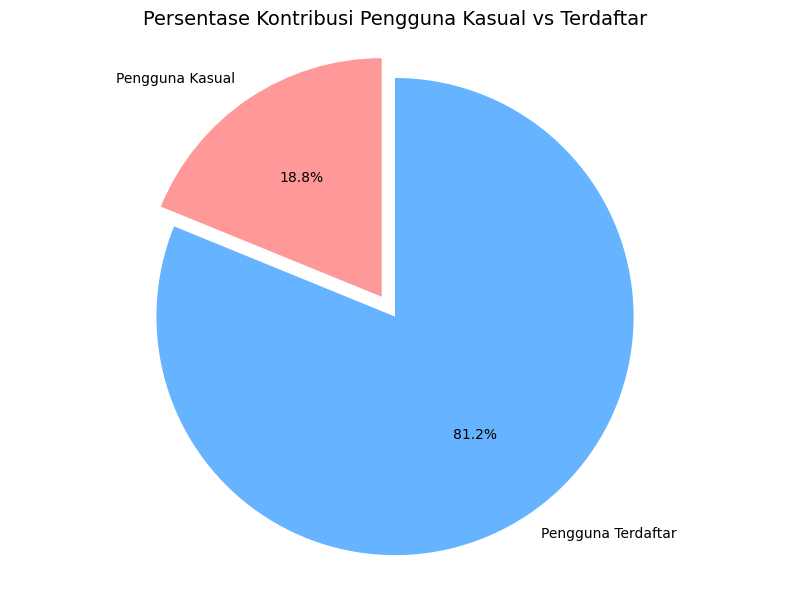

In [21]:
# Hitung total penyewaan untuk casual, registered, dan cnt
total_casual = day_df['casual'].sum()
total_registered = day_df['registered'].sum()
total_cnt = day_df['cnt'].sum()

# Hitung persentase kontribusi
percentage_casual = (total_casual / total_cnt) * 100
percentage_registered = (total_registered / total_cnt) * 100

# Data untuk pie chart
labels = ['Pengguna Kasual', 'Pengguna Terdaftar']
sizes = [percentage_casual, percentage_registered]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

# Visualisasi pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Persentase Kontribusi Pengguna Kasual vs Terdaftar', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

**Insight:**

Terlihat dari hasil visualisasi pengguna registered menyumbang sekitar 80% yang melakukan rental sepeda dan pengguna casual menyumbang sekitar 20% yang dimana ini menunjukkan bahwa pengguna registered adalah pelanggan utama dari rental sepeda ini dan pengguna kasual meskipun sedikit dibandingkan pengguna registered tetap memberikan kontribusi penting terutama di akhir pekan atau musim tertentu.

## Conclusion

- **Conclusion Pertanyaan 1:** Berdasarkan analisis tren penggunaan rental sepeda mengalami peningkatan signifikan dari tahun ke tahun yang secara keseluruhan memberikan gambaran bahwa layanan rental sepeda ini memiliki minat tren tinggi yang tidak hanya secara musiman tetapi juga secara tahunan yang berpotensi untuk terus berkembang di masa depan.


- **Conclusion Pertanyaan 2:** Berdasarkan analisis hari kerja dan akhir pekan memiliki perbedaan signifikan dalam penggunaan rental sepeda. Penggunaan rental sepeda lebih tinggi secara keseluruhan pada hari kerja, sedangkan pada akhir pekan total penyewaan menurun secara keseluruhan, namun tetap diminati oleh kedua pengguna.


- **Conclusion Pertanyaan 3:** Berdasarkan analisis kondisi cuaca memiliki dampak signifikan terhadap penyewaan sepeda. Kondisi cuaca cerah merupakan permintaan tertinggi dan cuaca buruk hampir sepenuhnya menghentikan aktivitas bersepeda.


- **Conclusion Pertanyaan 4:** Berdasarkan analisis kontribusi pengguna registered merupakan kontributor terbesar yang menggunakan rental sepeda dibandingkan pengguna casual



In [22]:
#day_df.to_csv("main_data.csv", index=False)